In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
import pickle
import tensorflow as tf
import os
import random

import warnings
warnings.filterwarnings('ignore')

In [4]:
def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

In [5]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word

In [6]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

In [18]:
max_length = 35

tokenizer = pickle.load(open("tokenizer.pkl","rb"))

xception_model = tf.keras.applications.xception.Xception(include_top=False, pooling="avg")

model_20 = tf.keras.models.load_model('models/model_20.h5')
model_23 = tf.keras.models.load_model('models/model_23.h5')
model_24 = tf.keras.models.load_model('models/model_24.h5')
model_25 = tf.keras.models.load_model('models/model_25.h5')

In [9]:
with open(r'Flicker8k_text\Flickr_8k.testImages.txt') as file:
    all_test_images = file.read().split('\n') 

In [19]:
def get_captions_4_models(photo):
    description_20 = generate_desc(model_20, tokenizer, photo, max_length)
    description_23 = generate_desc(model_23, tokenizer, photo, max_length)
    description_24 = generate_desc(model_24, tokenizer, photo, max_length)
    description_25 = generate_desc(model_25, tokenizer, photo, max_length)

    print('model_1 :',  ' '.join(description_20.split()[1:-1]))
    print('model_2 :',  ' '.join(description_23.split()[1:-1]))
    print('model_3 :',  ' '.join(description_24.split()[1:-1]))
    print('model_4 :',  ' '.join(description_25.split()[1:-1]))

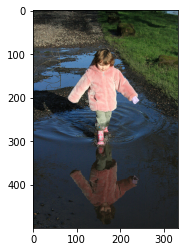

In [53]:
photo = extract_features(r'flicker8k_Dataset\358559906_d5f3f584f4.jpg', xception_model)
img = Image.open(r'flicker8k_Dataset\358559906_d5f3f584f4.jpg')
plt.imshow(img)

In [54]:
get_captions_4_models(photo)

model_1 : boy in red shirt is running through the water
model_2 : man in red shirt is standing on the edge of water
model_3 : boy in red shirt is running through the water
model_4 : boy in red shirt is running through the water


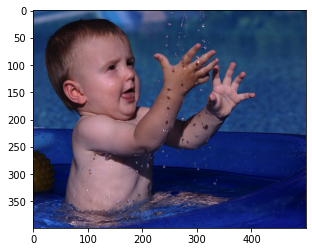

In [55]:
photo = extract_features(r'flicker8k_Dataset\3621652774_fd9634bd5b.jpg', xception_model)
img = Image.open(r'flicker8k_Dataset\3621652774_fd9634bd5b.jpg')
plt.imshow(img)

In [56]:
get_captions_4_models(photo)

model_1 : baby is splashing in pool
model_2 : boy in swimming trunks is swimming underwater in pool
model_3 : boy in pool
model_4 : boy is swimming underwater in pool


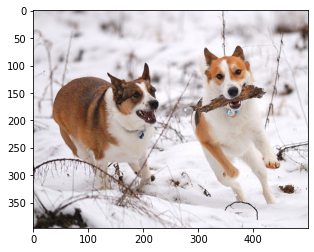

In [57]:
photo = extract_features(r'flicker8k_Dataset\365274901_576b0f8241.jpg', xception_model)
img = Image.open(r'flicker8k_Dataset\365274901_576b0f8241.jpg')
plt.imshow(img)

In [58]:
get_captions_4_models(photo)

model_1 : dog is running through the snow
model_2 : two dogs are playing in the snow
model_3 : two dogs are playing in the snow
model_4 : two dogs are playing in the snow


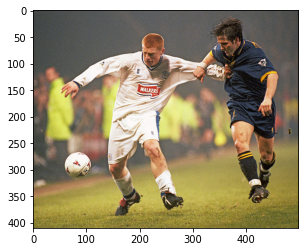

In [65]:
photo = extract_features(r'flicker8k_Dataset\2987121689_f9de6c479b.jpg', xception_model)
img = Image.open(r'flicker8k_Dataset\2987121689_f9de6c479b.jpg')
plt.imshow(img)

In [66]:
get_captions_4_models(photo)

model_1 : two boys are playing soccer on field
model_2 : two boys are playing soccer on field
model_3 : two boys are playing soccer on field
model_4 : two boys are playing soccer on field


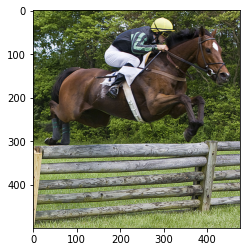

In [75]:
photo = extract_features(r'flicker8k_Dataset\3542771548_fcb8fa0cba.jpg', xception_model)
img = Image.open(r'flicker8k_Dataset\3542771548_fcb8fa0cba.jpg')
plt.imshow(img)

In [76]:
get_captions_4_models(photo)

model_1 : woman in white helmet is riding brown horse
model_2 : horse and rider are riding horses on the beach
model_3 : horse jumps over fence
model_4 : man in blue cowboy hat is riding horse on the beach


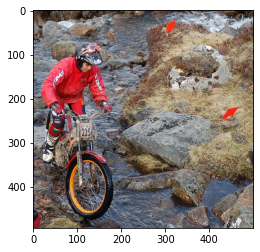

In [91]:
photo = extract_features(r'flicker8k_Dataset\143552829_72b6ba49d4.jpg', xception_model)
img = Image.open(r'flicker8k_Dataset\143552829_72b6ba49d4.jpg')
plt.imshow(img)

In [92]:
get_captions_4_models(photo)

model_1 : man on bike is riding on dirt path
model_2 : man on bike is riding on dirt path
model_3 : man is riding bike down the road
model_4 : man on bike is riding on dirt path


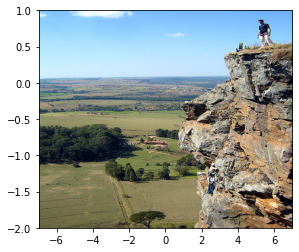

In [106]:
photo = extract_features(r'flicker8k_Dataset\143684568_3c59299bae.jpg', xception_model)
img = Image.open(r'flicker8k_Dataset\143684568_3c59299bae.jpg')
plt.imshow(img, origin='upper',extent=[-7, 7, -2, 1], aspect=4)

In [94]:
get_captions_4_models(photo)

model_1 : man is standing on top of rocky mountain
model_2 : man is standing on the edge of rocky cliff overlooking the mountains
model_3 : man is standing on top of rock
model_4 : man is sitting on rock overlooking the mountains
